# Machine Learning pour la détection de fraude
Application du tuto ci-dessous:
#https://thecleverprogrammer.com/2020/08/04/fraud-detection-with-machine-learning/

Importation du fichier csv payment_fraud.Le fichier est constitué de 5 colonnes qui sont:

*   AccountAgeDay -> âge du compte
*   num item -> nombre d'item acheté
*   localtime -> quand le paiement a été fait
*   label -> fraude (1) ou non (0)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving payment_fraud.csv to payment_fraud.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('payment_fraud.csv',sep=';')
df.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label
0,29,1,4.745402,28.204861,0
1,725,1,4.742303,0.000000,0
2,845,1,4.921318,0.000000,0
3,503,1,4.886641,0.000000,0
4,2000,1,5.040929,0.000000,0


In [ ]:
# Je sépare mon dataframe en 4 dataframe différents.
# mon X_train et mon y_train qui vont servir à entrainer mon modèle de machine learning
#mon X_test pour tester si mon modèle est bon
#mon y_test pour réaliser une prédiction
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('label', axis=1), df['label'],
    test_size=0.33, random_state=17)

WIKIPEDIA : 
La régression logistique ou modèle logit est un modèle de régression binomiale. Comme pour tous les modèles de régression binomiale, il s'agit de modéliser au mieux un modèle mathématique simple à des observations réelles nombreuses. En d'autres termes d'associer à un vecteur de variables aléatoires {\displaystyle (x_{1},\ldots ,x_{K})}(x_{1},\ldots ,x_{K}) une variable aléatoire binomiale génériquement notée {\displaystyle y}y. La régression logistique constitue un cas particulier de modèle linéaire généralisé. Elle est largement utilisée en apprentissage automatique.

In [ ]:
#utilisation d'une régression logistique (modèle de machine learning)
clf = LogisticRegression().fit(X_train, y_train)

# réalisation d'une prédiction
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

1.0


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[12753     0]
 [    0   190]]


In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

"The confusion matrix is a 2 dimensional array comparing predicted category labels to the true label. For binary classification, these are the True Positive, True Negative, False Positive and False Negative categories."

TP (True Positives) : les cas où la prédiction est positive, et où la valeur réelle est effectivement positive. Exemple : le médecin vous annonce que vous êtes enceinte, et vous êtes bel et bien enceinte.

TN (True Negatives) : les cas où la prédiction est négative, et où la valeur réelle est effectivement négative. Exemple : le médecin vous annonce que vous n’êtes pas enceinte, et vous n’êtes effectivement pas enceinte.

FP (False Positive) : les cas où la prédiction est positive, mais où la valeur réelle est négative. Exemple : le médecin vous annonce que vous êtes enceinte, mais vous n’êtes pas enceinte.
FN (False Negative) : les cas où la prédiction est négative, mais où la valeur réelle est positive. Exemple : le médecin vous annonce que vous n’êtes pas enceinte, mais vous êtes enceinte.


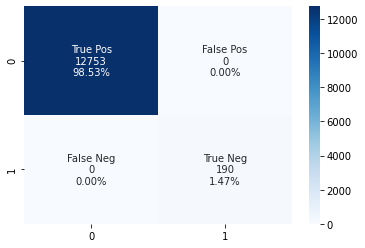

In [ ]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [ ]:
accuracy_score(y_test, y_pred)

1.0

In [ ]:
print(X_test)

       accountAgeDays  numItems  localTime  paymentMethodAgeDays
26915            2000         1   4.921318              0.143750
38674             452         1   4.921349            451.174306
6429               15         1   4.742303             14.773611
17916              89         1   4.886641              0.000000
24720            2000         1   5.034622            126.986111
...               ...       ...        ...                   ...
36029            1704         1   4.505662              0.040972
32707             105         2   5.034622            104.145833
11642              72         1   4.524580             71.372917
31332            2000         1   4.505662              0.000694
16599            2000         1   4.921318              0.000000

[12943 rows x 4 columns]
